In [1]:
from aux_functions import *

### (Opcional) Extracción de frames

In [2]:
video_path = '/Users/diegosilveracoeff/Downloads/Video_Rami.mp4'
frame_nums = [32, 33]  # Números de frames que deseas extraer
output_folder = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain'

extract_frames(video_path, frame_nums, output_folder)

Frame 32 guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain/frame_32.tif
Frame 33 guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain/frame_33.tif


### Defino rutas de trabajo y cargo imágenes

En las siguientes celdas se importan la imagen de referencia y la imagen objetivo

Valor mínimo de diferencia:  -221
Valor máximo de diferencia:  217
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain/residual_frame.tif


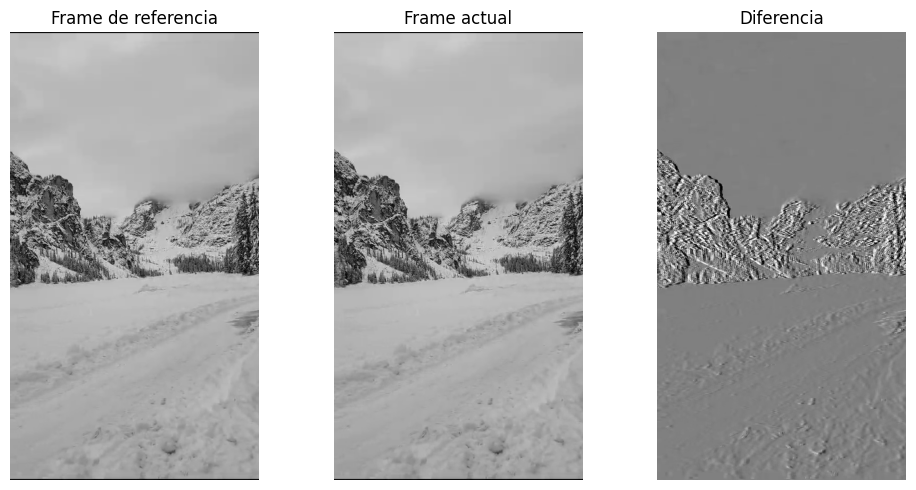

In [3]:
# folder_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian'
# reference_frame_path = os.path.join(folder_path, 'DCM_reference_image.tif')
# current_frame_path = os.path.join(folder_path, 'DCM_7x3_image.tif')
# residual_1_path = os.path.join(folder_path, 'residual_image.tif')

folder_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain'
reference_frame_path = os.path.join(folder_path, 'frame_32.tif')
current_frame_path = os.path.join(folder_path, 'frame_33.tif')
residual_1_path = os.path.join(folder_path, 'residual_frame.tif')

tittles = ['Frame de referencia','Frame actual','Diferencia']

subtract_frames(current_frame_path, reference_frame_path, residual_1_path, clip=True)

plot_three_images(reference_frame_path, current_frame_path, residual_1_path, tittles)

(864, 480, 2)
flow_x guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain/flow_x.npy
flow_y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain/flow_y.npy
Visualización del flujo óptico guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain/optical_flow_visualization.png


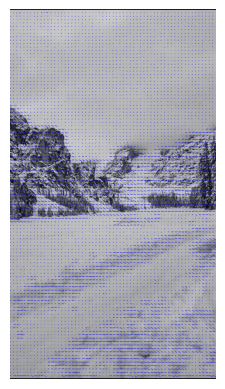

In [4]:
optical_flow(current_frame_path, reference_frame_path, folder_path)

In [5]:
# def motion_compensation_2(reference_frame_path, current_frame_path, flow_x_path, flow_y_path, output_path):

#     curr_frame = cv2.imread(current_frame_path)
#     ref_frame = cv2.imread(reference_frame_path)


#     # Convertir las imágenes a escala de grises
#     curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)
#     ref_gray = cv2.cvtColor(ref_frame, cv2.COLOR_BGR2GRAY)

#     # Cargar los archivos flow_x.npy y flow_y.npy
#     flow_x = np.load(flow_x_path)
#     flow_y = np.load(flow_y_path)

#     print('flow_x.shape: ', flow_x.shape)
#     print('curr_frame.shape: ', curr_frame.shape)
#     # Aplicar el flujo óptico al segundo frame
#     # corrected_reference = np.zeros_like(curr_gray)
#     # for i in range(corrected_reference.shape[0]):
#     #     for j in range(corrected_reference.shape[1]):
#     #         corrected_reference[i][j] = ref_gray[j - round(flow_x[i][j])][i - round(flow_y[i][j])]

#     corrected_reference = np.zeros_like(curr_gray)
#     for i in range(corrected_reference.shape[0]):
#         for j in range(corrected_reference.shape[1]):
#             corrected_reference[i][j] = ref_gray[i - round(flow_y[i][j])][j - round(flow_x[i][j])]

#     #corrected_reference_path = os.path.join(folder_path, 'corrected_reference.tif')
#     cv2.imwrite(output_path, corrected_reference)

#     plt.imshow(corrected_reference, cmap='gray', vmin=0, vmax=np.max(corrected_reference))
#     plt.colorbar()
#     plt.title('Corrected reference image')
#     plt.axis('off')  # Ocultar ejes
#     plt.show()
#     return

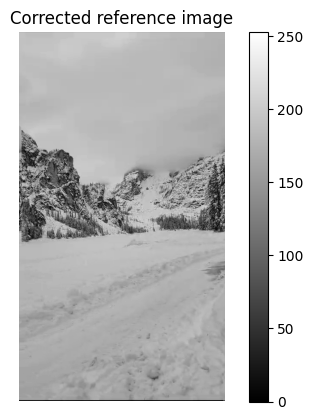

In [6]:
flow_x_path = os.path.join(folder_path, 'flow_x.npy')
flow_y_path = os.path.join(folder_path, 'flow_y.npy')

corrected_reference_path = os.path.join(folder_path, 'corrected_reference.tif')
motion_compensation(reference_frame_path, current_frame_path, flow_x_path, flow_y_path, corrected_reference_path)

In [7]:
residual_2_path = os.path.join(folder_path, 'residual_2.tif')

subtract_frames(corrected_reference_path, current_frame_path, residual_2_path)

Valor mínimo de diferencia:  -182
Valor máximo de diferencia:  199
Resultado de la resta ajustado y guardado como /Users/diegosilveracoeff/Desktop/Fing/DCM/Mountain/residual_2.tif


In [8]:
#diff_original = cv2.imread('/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/residual_image.png')
#diff_corrected = cv2.imread('/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/motion_corrected_difference.png')

res_1 = cv2.imread(residual_1_path)
res_2 = cv2.imread(residual_2_path)

energy_diff_original = np.sum(np.abs(res_1-128))
energy_diff_corrected = np.sum(np.abs(res_2-128))

print(energy_diff_original)
print(energy_diff_corrected)

102645978
86134572


### Transformada coseno

In [13]:
dct_path = os.path.join(folder_path, 'DCT.tif')
q_path = os.path.join(folder_path, 'quantized_image.tif')

def quantization_2(image, q_step, output_path):
    '''
    '''
    flat_image = image.reshape((image.shape[0] * image.shape[1]))
    print('image.shape: ', image.shape)
    print('flat_image.shape: ', flat_image.shape)
    quantized_list = [round(value / q_step) * q_step for value in flat_image]
    print(type(quantized_list))
    quantized_array =  np.array(quantized_list)
    print(quantized_array[0])
    print(type(quantized_array))
    print(quantized_array)
    quantized_image = quantized_array.reshape((image.shape[0], image.shape[1]))
    cv2.imwrite(output_path, quantized_image, [cv2.IMWRITE_TIFF_COMPRESSION, 1])
    return quantized_image, quantized_array

dct_image = dct(residual_2_path, dct_path)
q_image, q_array = quantization_2(dct_image, 10, q_path)
print(np.max(q_image))
#print(dct_image[300][300])
print(q_array)

#plot_one_img(dct_path)

image.shape:  (864, 480)
flat_image.shape:  (414720,)
<class 'list'>
82570
<class 'numpy.ndarray'>
[82570   -40    80 ...   -10   -10   -10]
82570
[82570   -40    80 ...   -10   -10   -10]


In [14]:
# #Defino función de cuantización

# def redondear_arreglo(arreglo):
#     # Usamos una lista por comprensión para redondear cada elemento del arreglo
#     arreglo_redondeado = [round(elemento) for elemento in arreglo]
#     return arreglo_redondeado

# # Ejemplo de uso:
# arreglo_original = [1.2, 2.5, 3.7, 4.4, 5.9]
# arreglo_redondeado = redondear_arreglo(arreglo_original)
# print(arreglo_redondeado)  # Salida: [1, 3, 4, 4, 6]

# def quantization(image, q_step):
#     # Usamos una lista por comprensión para redondear cada elemento del arreglo al múltiplo más cercano del paso dado
#     quantized_image = [round(value / q_step) * q_step for value in image]
#     return quantized_image

# # Ejemplo de uso:
# arreglo_original = [1.2, 2.5, 3.7, 4.4, 5.9, 10, 12.3, 17.8]
# paso = 5
# arreglo_cuantizado = quantization(arreglo_original, paso)
# print(arreglo_cuantizado)  # Salida: [0, 5, 5, 5, 5, 10, 10, 20]



In [15]:
def count_pixel_values_2(image_array):
    values, counts = np.unique(image_array, return_counts=True)
    result = [(str(value), count) for value, count in zip(values, counts) if count > 0]
    return result

count = count_pixel_values_2(q_image)
print(count)
print(len(count))
symbols, codes = huffman_codebook(count)
print(symbols, codes)

bin_path = os.path.join(folder_path, 'message.bin')

[('-160', 1), ('-150', 1), ('-140', 2), ('-130', 10), ('-120', 4), ('-110', 8), ('-100', 12), ('-90', 23), ('-80', 23), ('-70', 36), ('-60', 69), ('-50', 157), ('-40', 503), ('-30', 3099), ('-20', 22081), ('-10', 96676), ('0', 169054), ('10', 96847), ('20', 22168), ('30', 3105), ('40', 484), ('50', 147), ('60', 88), ('70', 38), ('80', 33), ('90', 13), ('100', 12), ('110', 6), ('120', 8), ('130', 7), ('140', 2), ('150', 1), ('170', 1), ('82570', 1)]
34
Símbolo: -160, Código Huffman: 11010100100011010
Símbolo: -150, Código Huffman: 11010100100011001
Símbolo: -140, Código Huffman: 11010100110111100
Símbolo: -130, Código Huffman: 11010100100010
Símbolo: -120, Código Huffman: 1101010011011111
Símbolo: -110, Código Huffman: 11010100100000
Símbolo: -100, Código Huffman: 11010100110101
Símbolo: -90, Código Huffman: 1101010011001
Símbolo: -80, Código Huffman: 1101010011000
Símbolo: -70, Código Huffman: 1101010011101
Símbolo: -60, Código Huffman: 110101001111
Símbolo: -50, Código Huffman: 110101

In [12]:
def write_encoded_file_2(q_array, symbols, codes, output_path):
    '''
    '''
    encoded_file = ''

    for i in range(len(q_array)):
        j = np.where(symbols == q_array[i])
        encoded_file = encoded_file + codes[j[0][0]]
    print('Largo de la imagen codificada (mensaje)', len(encoded_file))
    bytes_to_write = add_fillout_number(encoded_file)
    with open(output_path, 'wb') as f:
        # Convertir la cadena de bits en una secuencia de bytes
        final_bytes = int(bytes_to_write, 2).to_bytes((len(bytes_to_write) + 7) // 8, byteorder='big')
        f.write(final_bytes)
    return

write_encoded_file_2(q_array, symbols, codes, bin_path)

Largo de la imagen codificada (mensaje) 909142
Fillout_number:  2
0000001000110101001101111010110101011110101001110011010100101110101001011101010010111010011010100001101010101101010010111010011010100111001101010011011011010100001101010010011101010000110101000011010011010101011010100001101010010111010100001101010000110101001011101010010111010011010100101101101010011100110101000011010100101110011010100101110101010110101010110101001011101010101101010000101101010101011010100001101010101101010010011101010000110011010100101110100110101001011011010101011001101001101010101101001101010000110011010011010011010011001100110011010011010100001011010011010010101110110010101011001010110000100101011001100101011111101110101111111111111111110101111110111110111101111010111111101111111111110111010111011011111011010111111101111011111110111011011110111111111101101101100011110111101000110111111110101101111111010110110111100011001001111101101111110011010010110011110011001011001111001010010011111001111001000011

In [2]:
# Pruebo la codificación con la imagen de referencia 
reference_frame_path = '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/DCM_reference_image.png'
counted_pixels = count_pixel_values(reference_frame_path)
print(counted_pixels)
symbols, codes = huffman_codebook(counted_pixels)
print(symbols, codes)
write_encoded_file(reference_frame_path, symbols, codes, '/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/Encoded_reference_image.bin')

(32, 32)
[('0', 999), ('28', 4), ('57', 8), ('85', 4), ('113', 4), ('170', 4), ('255', 1)]
Símbolo: 0, Código Huffman: 1
Símbolo: 28, Código Huffman: 0101
Símbolo: 57, Código Huffman: 011
Símbolo: 85, Código Huffman: 000
Símbolo: 113, Código Huffman: 0100
Símbolo: 170, Código Huffman: 0011
Símbolo: 255, Código Huffman: 0010
[  0  28  57  85 113 170 255] ['1' '0101' '011' '000' '0100' '0011' '0010']
(32, 32)
Largo de la imagen codificada (mensaje) 1087
Fillout_number:  1
000000010111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111010101100001101011111111111111111111111111110110100001

Cadena binaria: 000000010111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111010101100001101011111111111111111111111111110110100001101000111111111111111111111111111110000011001000110001111111111111111111111111110110100001101000111111111111111111111111111110101011000011010111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

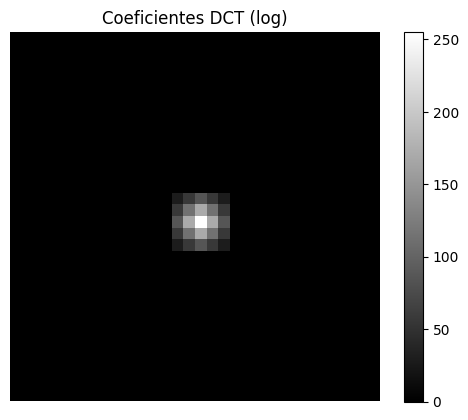

In [5]:
message = read_bin_file('/Users/diegosilveracoeff/Desktop/Fing/DCM/Synthetic_Gaussian/Encoded_reference_image.bin')
print(type(message))
decoded_file = decode_symbols(message, symbols, codes, np.array([32,32]))
plt.imshow(decoded_file, cmap='gray', vmin=0, vmax=np.max(decoded_file))
plt.colorbar()
plt.title('Coeficientes DCT (log)')
plt.axis('off')  # Ocultar ejes
plt.show()